## **1.Import Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel


from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler

!pip install category_encoders
import category_encoders as ce

# Imbalanced-Learn Library
#!pip install imblearn
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN, SMOTENC, RandomOverSampler
from imblearn.combine import SMOTETomek, SMOTEENN

from sklearn.model_selection import train_test_split

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
#Logistic Regression
from sklearn.linear_model import LogisticRegression
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
import lightgbm as lgb
from sklearn import ensemble, gaussian_process, linear_model, tree, naive_bayes, svm, discriminant_analysis, neighbors
#!pip install xgboost
import xgboost

from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from collections import Counter
#metrics
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, roc_auc_score, confusion_matrix, classification_report

nltk.download('stopwords')
nltk.download('wordnet')

import nltk
nltk.download('omw-1.4')

import nltk
nltk.download('punkt')

!pip install vaderSentiment

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading wordnet: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading omw-1.4: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading punkt: <urlopen error [WinE

## **2. Import Data**

In [2]:
#from google.colab import files
#uploaded = files.upload()

In [3]:
df = pd.read_excel("hotel_reviews.xlsx")
df.head(5)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


## **3. Data Understanding**

In [4]:
df.shape

(20491, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.index


RangeIndex(start=0, stop=20491, step=1)

In [8]:
df.nunique()


Review    20491
Rating        5
dtype: int64

In [9]:
df.describe()


,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [10]:
#Total no. of values in Rating column
df["Rating"].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

##**4. EDA**

Text(0.5, 1.0, 'Rating Distribution')

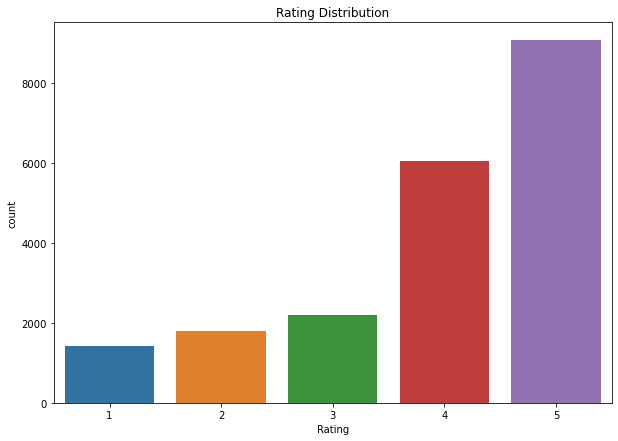

In [11]:
# Distribution of Ratings

plt.figure(figsize=(10,7))
sns.countplot(df["Rating"])
plt.title("Rating Distribution")

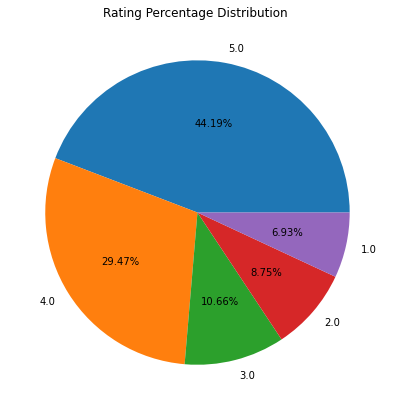

In [12]:
#Percentage distribution of ratings

plt.figure(figsize=(11,7))
plt.pie(df['Rating'].value_counts(),labels=['5.0','4.0','3.0','2.0','1.0'], autopct='%1.2f%%')
plt.title("Rating Percentage Distribution ")
plt.show()

count    9054.000000
mean       93.963773
std        90.977999
min         7.000000
25%        44.000000
50%        69.000000
75%       111.000000
max      1755.000000
Name: Length, dtype: float64

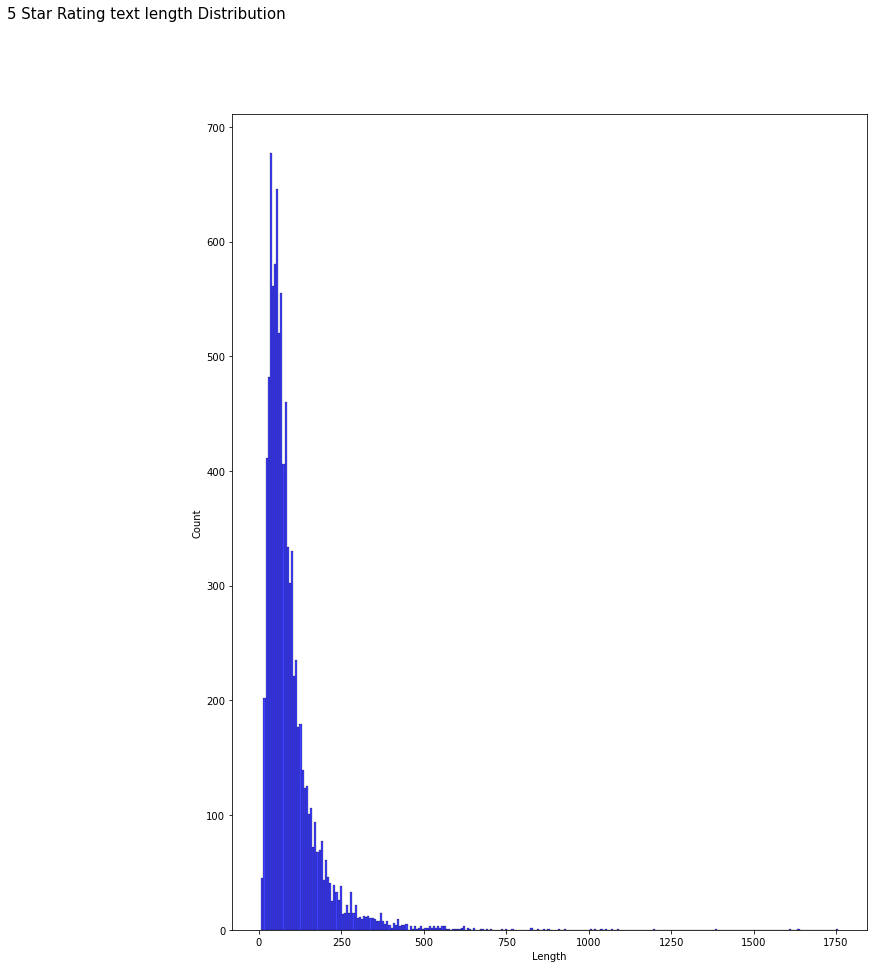

In [13]:
fig = plt.figure(figsize=(25,15))
df["Length"] = df.Review.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['Rating']==5]['Length'], ax=ax1,color='blue')
fig.suptitle('5 Star Rating text length Distribution', fontsize=15)
display(df.Length[df.Rating==5].describe())

## **5. Data Pre Processing**

In [14]:
import re

### **5.1 Tokenization || Lemmatization || Lower Case || Removing numbers**

In [15]:
cleaned_data=[]
for i in range(0,len(df)):
    review=re.sub('[^a-zA-Z]',' ',df['Review'][i])
    review=review.lower() # lower case
    review=review.split() # Tokenization
    cleaned_data.append(review) # removing the numbers from the review

In [16]:
#cleaned_data

In [17]:
# importing the stopwords
from nltk.corpus import stopwords
# Stemming / Lemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [18]:
# Lemmatizing
cleaned_data=[]
lz=WordNetLemmatizer()

for i in range(0,len(df)):
    review=re.sub('[^a-zA-Z]',' ',df['Review'][i])
    review=review.lower() # lower case
    review=review.split() # Tokenization
    review=[lz.lemmatize(word) for word in review if word not in stopwords.words('english')]
    review=' '.join(review)
    cleaned_data.append(review)

In [19]:
#cleaned_data

In [20]:
n = df.columns[0]
df.drop(n, axis = 1, inplace = True)
df[n] = cleaned_data

In [21]:
df

,Rating,Length,Review
0,4,87,nice hotel expensive parking got good deal sta...
1,2,250,ok nothing special charge diamond member hilto...
2,3,217,nice room experience hotel monaco seattle good...
3,5,89,unique great stay wonderful time hotel monaco ...
4,5,191,great stay great stay went seahawk game awesom...
...,...,...,...
20486,5,109,best kept secret rd time staying charm star ca...
20487,4,39,great location price view hotel great quick pl...
20488,2,63,ok look nice modern outside desk staff n parti...
20489,1,781,hotel theft ruined vacation hotel opened sept ...


### **5.2 Textblob || Vader Sentiment**


*   Textblob can be used for complex analysis and working with textual data. 

*   When a sentence is passed into Textblob it gives two outputs, which are polarity and subjectivity.


*   Polarity is the output that lies between [-1,1], where -1 refers to negative sentiment and +1 refers to positive sentiment. Subjectivity is the output that lies within [0,1] and refers to personal opinions and judgments.

*   For Sentiment Analysis, we’ll use VADER Sentiment Analysis, where VADER means Valence Aware Dictionary and sEntiment Reasoner.


*   VADER utilizes a mix of lexical highlights (e.g., words) that are, for the most part, marked by their semantic direction as one or the other positive or negative. Thus, VADER not only tells about the Polarity score yet, in addition, it tells us concerning how positive or negative a conclusion is.

*   VADER produces four sentiment measurements from these word grading, which you can see underneath. The initial three, +ve, neutral, and -ve, address the extent of the content that falls into those classifications. The last measurement, the compound score, is the total amount of the lexicon grades, which have been normalized to run between – 1 and 1.





In [22]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def detect_tb_polarity(text):
    return TextBlob(text).sentiment.polarity

def detect_tb_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def detect_vader_pos(text):
    return vader.polarity_scores(text)['pos']

def detect_vader_neg(text):
    return vader.polarity_scores(text)['neg']

def detect_vader_comp(text):
    return vader.polarity_scores(text)['compound']

In [23]:
df['tb_polarity'] = df.Review.apply(detect_tb_polarity)
df['tb_subjectivity'] = df.Review.apply(detect_tb_subjectivity)

vader = SentimentIntensityAnalyzer()
df['vader_pos'] = df.Review.apply(detect_vader_pos)
df['vader_neg'] = df.Review.apply(detect_vader_neg)
df['vader_comp'] = df.Review.apply(detect_vader_comp)


In [24]:
df

,Rating,Length,Review,tb_polarity,tb_subjectivity,vader_pos,vader_neg,vader_comp
0,4,87,nice hotel expensive parking got good deal sta...,0.208744,0.687000,0.324,0.056,0.9808
1,2,250,ok nothing special charge diamond member hilto...,0.246004,0.516630,0.255,0.052,0.9952
2,3,217,nice room experience hotel monaco seattle good...,0.266138,0.606239,0.249,0.077,0.9921
3,5,89,unique great stay wonderful time hotel monaco ...,0.504825,0.691228,0.444,0.000,0.9949
4,5,191,great stay great stay went seahawk game awesom...,0.469643,0.627296,0.307,0.066,0.9955
...,...,...,...,...,...,...,...,...
20486,5,109,best kept secret rd time staying charm star ca...,0.209229,0.526768,0.292,0.094,0.9810
20487,4,39,great location price view hotel great quick pl...,0.463333,0.600000,0.432,0.000,0.9790
20488,2,63,ok look nice modern outside desk staff n parti...,0.171220,0.524304,0.195,0.065,0.8655
20489,1,781,hotel theft ruined vacation hotel opened sept ...,0.145881,0.532371,0.193,0.151,0.9919


In [25]:
#user def function for subjectivity

def sentiment(x):
    if x<-0.2:
        return 'negative'
    
    elif -0.2<x<0.2:
        return 'neutral'
    
    else:
        return 'positive'
    
df['Polarity']=df['tb_polarity'].map(lambda x: sentiment(x))

def sentiment(y):

    if y < 0.45:
        return "negative"
    
    elif 0.45<y<0.55:
        return "neutral"
    
    else:
        return "positive"
 
df['Subjectivity'] = df['tb_subjectivity'].apply(sentiment)
df.sample(20)

,Rating,Length,Review,tb_polarity,tb_subjectivity,vader_pos,vader_neg,vader_comp,Polarity,Subjectivity
6189,3,49,convenient location pretty good value plus sid...,0.166429,0.557857,0.303,0.146,0.8598,neutral,positive
11828,5,83,great hotel perfect location got night barcelo...,0.392593,0.644444,0.389,0.102,0.9871,positive,positive
18507,5,84,majestic colonial punta cana little bit heaven...,0.168296,0.572118,0.330,0.030,0.9841,neutral,positive
11004,1,239,disco club music hotel n expect sleep complete...,0.002112,0.460664,0.161,0.112,0.8458,neutral,neutral
10215,3,82,great website okay room slightly hesistant arr...,0.100877,0.595614,0.306,0.043,0.9633,neutral,positive
8526,5,54,great location recently travelled florence ple...,0.246865,0.470661,0.296,0.039,0.9569,positive,neutral
3346,1,163,overpriced moldy musty hotel excited going pue...,0.000259,0.451575,0.122,0.110,0.0202,neutral,neutral
9237,5,20,great booking direct hotel give best rate wort...,0.571429,0.464286,0.677,0.000,0.9804,positive,neutral
10082,5,68,wonderful hotel definitely stay hotel located ...,0.231667,0.536984,0.363,0.000,0.9825,positive,neutral
19201,4,54,superb service stayed night january whilst rec...,0.652778,0.725926,0.482,0.034,0.9899,positive,positive


In [26]:
df.Polarity.value_counts()

positive    14770
neutral      5479
negative      242
Name: Polarity, dtype: int64

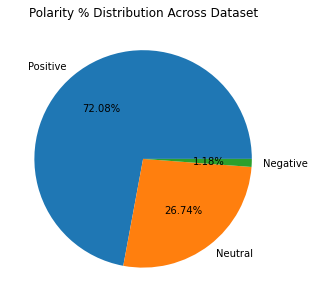

In [27]:
plt.figure(figsize=(8,5))
plt.pie(df['Polarity'].value_counts(),labels=['Positive','Neutral','Negative'],autopct='%1.2f%%')
plt.title("Polarity % Distribution Across Dataset")
plt.show()

In [28]:
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
  #print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

### **Top 10 words in positive dataframe-BIGRAM ANALYSIS**

In [29]:
#from collections import defaultdict

In [30]:
#get the count of every word in the column of dataframe
#positiveValues2=defaultdict(int)
#negativeValues2=defaultdict(int)

In [31]:
#get the count of every word in the column of dataframe where Polarity="positive"
#for text in df[df.Polarity=="positive"].Review:
#  for word in generate_N_grams(text,2):
#    positiveValues2[word]+=1

In [32]:
#df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))

In [33]:
#pd1bi=df_positive2[0][:10]
#pd2bi=df_positive2[1][:10]

In [34]:
#plt.figure(1,figsize=(16,4))
#plt.bar(pd1bi,pd2bi, color ='green',width = 0.4)
#plt.xlabel("Words in positive dataframe")
#plt.ylabel("Count")
#plt.title("Top 10 words in positive dataframe-BIGRAM ANALYSIS")
#plt.savefig("positive-bigram.png")
#plt.show()

### **Top 10 words in positive dataframe-TRIGRAM ANALYSIS**

In [35]:
#get the count of every word in the columns of dataframe

#positiveValues3=defaultdict(int)

In [36]:
#get the count of every word in the columns of dataframe where Polarity="positive"
#for text in df[df.Polarity=="positive"].Review:
#  for word in generate_N_grams(text,3):
#    positiveValues3[word]+=1

In [37]:
#df_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))

In [38]:
#pd1tri=df_positive3[0][:10]
#pd2tri=df_positive3[1][:10]

In [39]:
#plt.figure(1,figsize=(20,4))
#plt.bar(pd1tri,pd2tri, color ='green',
#        width = 0.4)
#plt.xlabel("Words in positive dataframe")
#plt.ylabel("Count")
#plt.title("Top 10 words in positive dataframe-TRIGRAM ANALYSIS")
#plt.savefig("positive-trigram.png")
#plt.show()

### **5.3 Applying TF-IDF vectorization**


TF-IDF or ( Term Frequency(TF) — TF-IDF vectorization gives a numerical representation of words entirely dependent on the nature and number of documents being considered. The same words will have different vector representations in another corpus.

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1, 3), max_features=1500, tokenizer = word_tokenize)#max features create feature matrix with the most frequently occuring words.(40000 columns)
x = tfidf.fit_transform(cleaned_data).toarray()
x_features=pd.DataFrame(x)
x_features.head(5)

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.077797,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.06655,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.092969,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.076697,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
Reviews=pd.concat([df["Polarity"],x_features],axis=1)
Reviews.shape
Reviews.head(5)
#x.head()

,Polarity,0,1,2,3,4,5,6,7,8,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
0,positive,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1,positive,0.0,0.0,0.077797,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.06655,0.0,0.0,0.0,0.0,0.0,0.0
2,positive,0.0,0.0,0.092969,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
3,positive,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
4,positive,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.076697,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0


### **5.4 Label Encoding**

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
le = LabelEncoder()
for col in Reviews.select_dtypes(include='O').columns:
    Reviews[col]=le.fit_transform(Reviews[col])
for col in Reviews.columns:
    Reviews[col]=Reviews[col].astype(float)

In [44]:
Reviews.head(5)

,Polarity,0,1,2,3,4,5,6,7,8,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
0,2.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,0.0,0.077797,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.06655,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.092969,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.076697,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
Reviews.Polarity.value_counts()

2.0    14770
1.0     5479
0.0      242
Name: Polarity, dtype: int64

In [46]:
# Assigning the target variable.
x=Reviews.iloc[:,1:len(Reviews.columns)]
y=Reviews.iloc[:,0]

### **5.5 Handling Imbalanced Data Set**

In [47]:
# Checking different imbalance data handling technique with Different Classifiers

classifiers = [
               LogisticRegression(random_state=1),
#               GaussianNB(),
               #LinearSVC(random_state=1),
#               KNeighborsClassifier(),
#               DecisionTreeClassifier(random_state=1),
#               RandomForestClassifier(random_state=1),
#               XGBClassifier(random_state=1)
]

for clf in classifiers:
  rec = []
  acc = []
  pres = []
  f1 = []
  roc = []
  sampl = []

  #actual data without resampling
  clf.fit(x, y)
  pred = clf.predict(x)
  acc.append(accuracy_score(y, pred))
  rec.append(recall_score(y, pred,average='macro'))
  pres.append(precision_score(y, pred,average='macro'))
  f1.append(f1_score(y, pred,average='macro'))
  sampl.append('OriginalData')

  def resample_eval(resample_method, clf):
    x_res, y_res = resample_method.fit_resample(x, y.ravel())
    clf.fit(x_res, y_res)
    y_pred = clf.predict(x_res)
    acc.append(accuracy_score(y_res, y_pred))
    rec.append(recall_score(y_res, y_pred,average='macro'))
    pres.append(precision_score(y_res, y_pred,average='macro'))
    f1.append(f1_score(y_res, y_pred,average='macro'))
    sampl.append(resample_method.__class__.__name__)
    
  resamplers = [SMOTE(sampling_strategy='minority',random_state=1)
#                 RandomOverSampler(sampling_strategy='minority',random_state=1),
#                ADASYN(sampling_strategy='minority',random_state=1),
                ]

  for resampler in resamplers:
    resample_eval(resampler, clf)
  df_name = f'res_df_{clf.__class__.__name__}'
  vars()[df_name] = pd.DataFrame({'sampl':sampl,'acc':acc,'recall':rec,'pres': pres,'f1':f1})


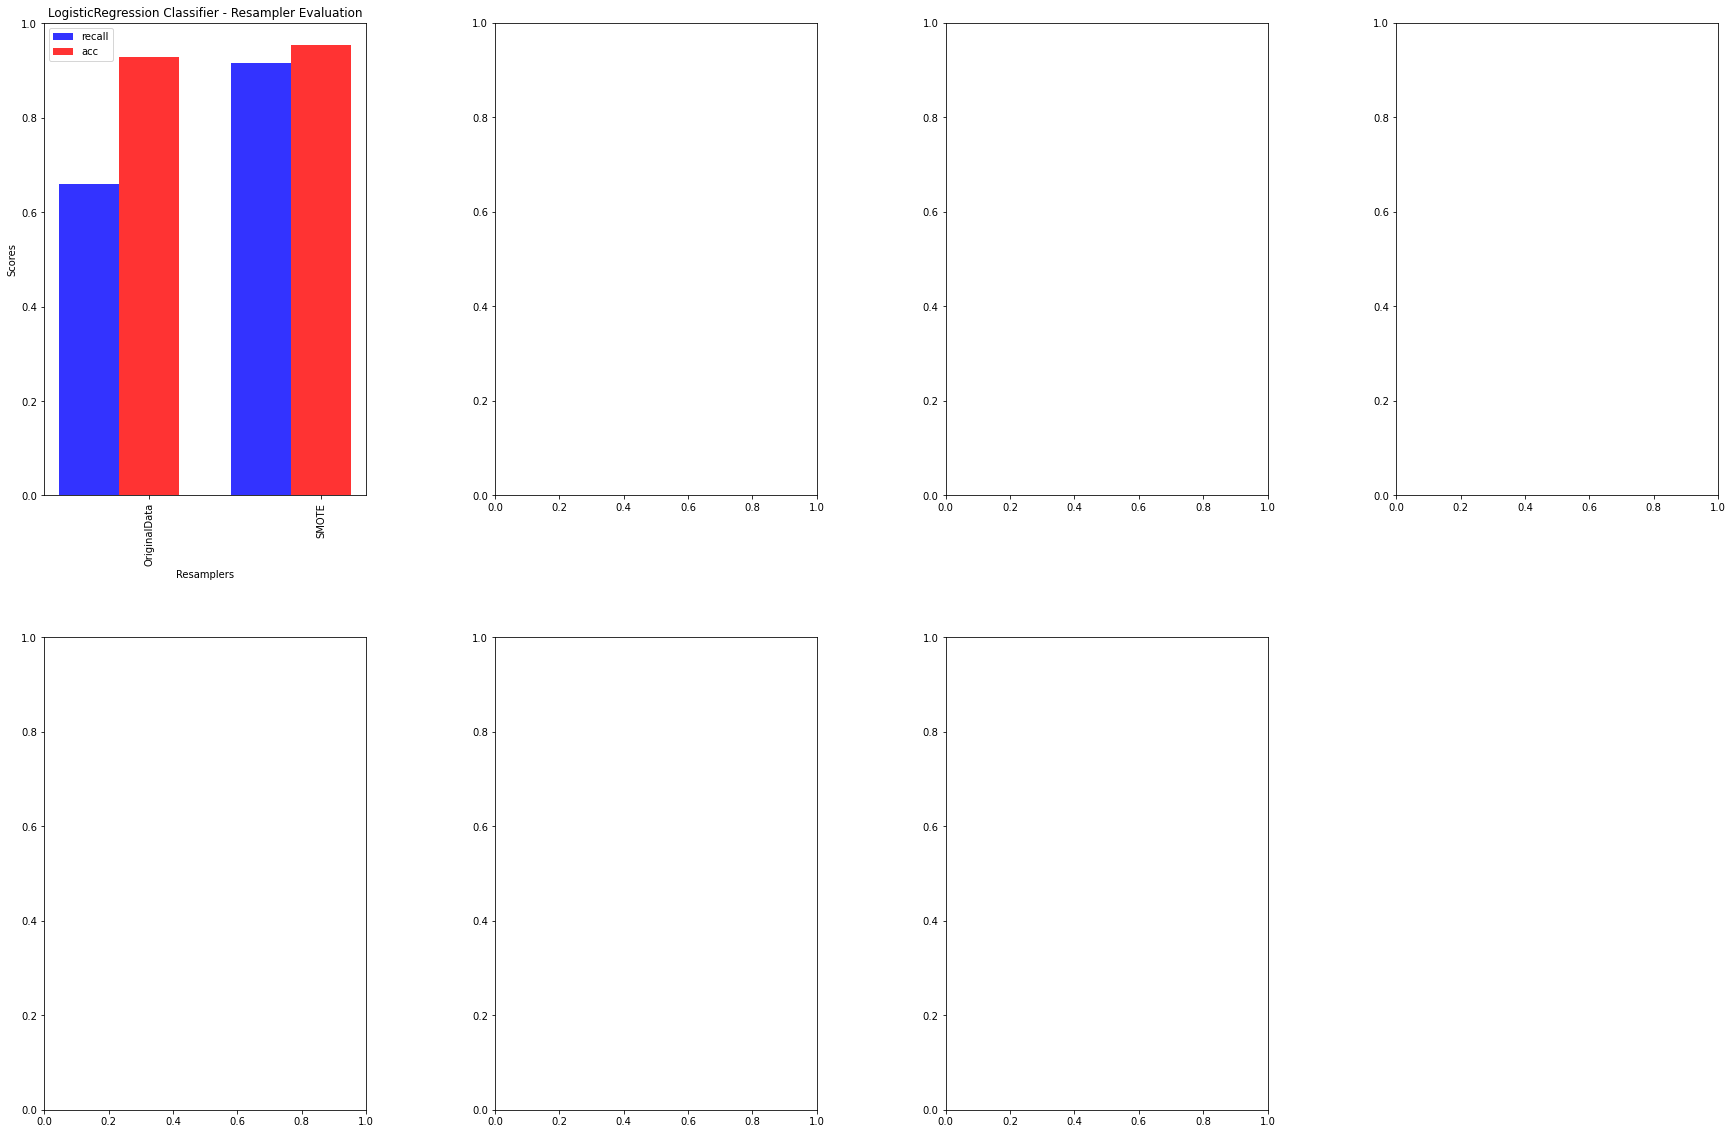

In [48]:
# Set up the axis with gridspec
fig = plt.figure(figsize=(30, 20))
bar_width = 0.35
opacity = 0.8
grid = plt.GridSpec(2, 4, wspace=0.4, hspace=0.3)
ax1 = fig.add_subplot(grid[0,0])
ax2 = fig.add_subplot(grid[0, 1])
ax3 = fig.add_subplot(grid[0, 2])
ax4 = fig.add_subplot(grid[1, 0])
ax5 = fig.add_subplot(grid[1, 1])
ax6 = fig.add_subplot(grid[1, 2])
ax7 = fig.add_subplot(grid[0, 3])
#LogisticRegression
ax1.bar(res_df_LogisticRegression.index, res_df_LogisticRegression.recall, bar_width, alpha=opacity, color='b',label='recall')
ax1.bar(res_df_LogisticRegression.index + bar_width, res_df_LogisticRegression.acc, bar_width, alpha=opacity, color='r', label='acc')
plt.sca(ax1)
plt.xlabel('Resamplers')
plt.ylabel('Scores')
plt.title('LogisticRegression Classifier - Resampler Evaluation')
plt.xticks(res_df_LogisticRegression.index + bar_width, res_df_LogisticRegression.sampl, rotation='vertical')
plt.legend()

#GaussianNB
#ax2.bar(res_df_GaussianNB.index, res_df_GaussianNB.recall, bar_width, alpha=opacity, color='b',label='recall')
#ax2.bar(res_df_GaussianNB.index + bar_width, res_df_GaussianNB.acc, bar_width, alpha=opacity, color='r', label='acc')
#plt.sca(ax2)
#plt.xlabel('Resamplers')
#plt.ylabel('Scores')
#plt.title('GaussianNB Classifier - Resampler Evaluation')
#plt.xticks(res_df_GaussianNB.index + bar_width, res_df_GaussianNB.sampl, rotation='vertical')
#plt.legend()

#LinearSVC
#ax3.bar(res_df_LinearSVC.index, res_df_LinearSVC.recall, bar_width, alpha=opacity, color='b',label='recall')
#ax3.bar(res_df_LinearSVC.index + bar_width, res_df_LinearSVC.acc, bar_width, alpha=opacity, color='r', label='acc')
#plt.sca(ax3)
#plt.xlabel('Resamplers')
#plt.ylabel('Scores')
#plt.title('LinearSVC Classifier - Resampler Evaluation')
#plt.xticks(res_df_LinearSVC.index + bar_width,res_df_LinearSVC.sampl, rotation='vertical')
#plt.legend()

#KNeighborsClassifier
#ax4.bar(res_df_KNeighborsClassifier.index, res_df_KNeighborsClassifier.recall, bar_width, alpha=opacity, color='b',label='recall')
#ax4.bar(res_df_KNeighborsClassifier.index + bar_width, res_df_KNeighborsClassifier.acc, bar_width, alpha=opacity, color='r', label='acc')
#plt.sca(ax4)
#plt.xlabel('Resamplers')
#plt.ylabel('Scores')
#plt.title('KNeighborsClassifier Classifier - Resampler Evaluation')
#plt.xticks(res_df_KNeighborsClassifier.index + bar_width, res_df_KNeighborsClassifier.sampl, rotation='vertical')
#plt.legend()

#DecisionTreeClassifier
#ax5.bar(res_df_DecisionTreeClassifier.index, res_df_DecisionTreeClassifier.recall, bar_width, alpha=opacity, color='b',label='recall')
#ax5.bar(res_df_DecisionTreeClassifier.index + bar_width, res_df_DecisionTreeClassifier.acc, bar_width, alpha=opacity, color='r', label='acc')
#plt.sca(ax5)
#plt.xlabel('Resamplers')
#plt.ylabel('Scores')
#plt.title('DecisionTreeClassifier Classifier - Resampler Evaluation')
#plt.xticks(res_df_DecisionTreeClassifier.index + bar_width, res_df_DecisionTreeClassifier.sampl, rotation='vertical')
#plt.legend()

#RandomForestClassifier
#ax6.bar(res_df_RandomForestClassifier.index, res_df_RandomForestClassifier.recall, bar_width, alpha=opacity, color='b',label='recall')
#ax6.bar(res_df_RandomForestClassifier.index + bar_width, res_df_RandomForestClassifier.acc, bar_width, alpha=opacity, color='r', label='acc')
#plt.sca(ax6)
#plt.xlabel('Resamplers')
#plt.ylabel('Scores')
#plt.title('Random Forest Classifier - Resampler Evaluation')
#plt.xticks(res_df_RandomForestClassifier.index + bar_width, res_df_RandomForestClassifier.sampl, rotation='vertical')
#plt.legend()

#XGBClassifier
#ax7.bar(res_df_XGBClassifier.index, res_df_RandomForestClassifier.recall, bar_width, alpha=opacity, color='b',label='recall')
#ax7.bar(res_df_XGBClassifier.index + bar_width, res_df_XGBClassifier.acc, bar_width, alpha=opacity, color='r', label='acc')
#plt.sca(ax7)
#plt.xlabel('Resamplers')
#plt.ylabel('Scores')
#plt.title('XGB Classifier - Resampler Evaluation')
#plt.xticks(res_df_XGBClassifier.index + bar_width, res_df_XGBClassifier.sampl, rotation='vertical')
#plt.legend()


In [49]:
# selecting SMOTE resample technique to handle imbalance dataset

In [50]:
from imblearn.over_sampling import SMOTE
from collections import Counter

sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(x,y)

In [51]:
print('Shape of Future Matrix:',x.shape)

print('Shape of Target Vector:',y.shape)

print('Oversampled Target Variable Distribution:',Counter(y_res))


Shape of Future Matrix: (20491, 1500)
Shape of Target Vector: (20491,)
Oversampled Target Variable Distribution: Counter({2.0: 14770, 1.0: 14770, 0.0: 14770})


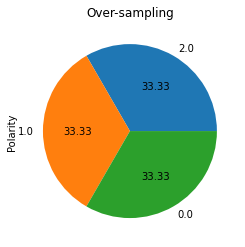

In [52]:
#plot After oversampling
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [53]:
x=x_res
y=y_res
y2=y.values.reshape(1,-1)


In [54]:
#Split dataset into training and testing

x_train,x_test, y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)
print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions x_train dataset:  (35448, 1500)
Number transactions y_train dataset:  (35448,)
Number transactions x_test dataset:  (8862, 1500)
Number transactions y_test dataset:  (8862,)


## **6. Model Building**

In [55]:
def evaluate_model(classifier):
    y_pred_test = classifier.predict(x_test)
    y_pred_train = classifier.predict(x_train)
    
    print("Train Accuracy : {0:0.4f}".format(accuracy_score(y_train, y_pred_train)))
    print("Test Accuracy : {0:0.4f}".format(accuracy_score(y_test, y_pred_test)))
    
    # getting the count of each category
    print("Count of each category:")
    print(pd.Series(y_pred_test).value_counts())
    print("-"*50)
    
    #Classification Report
    print("Classification Report:")
    print(classification_report(y_pred_test,y_test))
    print("-"*50)
    
    #Plotting confusion matrix
    print("Confusion Matrix:")
    print('Training Data')
    print(confusion_matrix(y_train,y_pred_train))
    print('Test Data')
    print(confusion_matrix(y_test,y_pred_test))
    
    f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

    plot_0 = sns.heatmap((confusion_matrix(y_train,y_pred_train)),annot=True,fmt='.5g',cmap="GnBu",ax=a[0][0]);
    a[0][0].set_title('Training Data')

    plot_1 = sns.heatmap((confusion_matrix(y_test,y_pred_test)),annot=True,fmt='.5g',cmap="GnBu",ax=a[0][1]);
    a[0][1].set_title('Test Data');

In [56]:
# Models which does not require scaling

MLA = [
    #Ensemble Methods
    #ensemble.AdaBoostClassifier(random_state=1),
    #ensemble.GradientBoostingClassifier(random_state=1),
    #ensemble.RandomForestClassifier(random_state=1),
    
    #GLM
    linear_model.LogisticRegression(random_state=1),
  
    #Navies Bayes
    #naive_bayes.GaussianNB(),
        
    #SVM
    #svm.SVC(probability=True, random_state=1),
    
    #Trees    
    #tree.DecisionTreeClassifier(random_state=1),    
   
    #xgboost
    #XGBClassifier(random_state=1),
      
    ]


# Models which Requires Scaling and we can see that the performance of the below model increased after scaling.
#MLA_SCAL = [
    #SVM
    #svm.SVC(probability=True, random_state=1),
    
#    ]

LogisticRegression
Train Accuracy : 0.9580
Test Accuracy : 0.9421
Count of each category:
1.0    3035
0.0    3014
2.0    2813
dtype: int64
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      3014
         1.0       0.93      0.90      0.91      3035
         2.0       0.90      0.94      0.92      2813

    accuracy                           0.94      8862
   macro avg       0.94      0.94      0.94      8862
weighted avg       0.94      0.94      0.94      8862

--------------------------------------------------
Confusion Matrix:
Training Data
[[11816     0     0]
 [  166 11166   484]
 [   10   828 10978]]
Test Data
[[2954    0    0]
 [  58 2739  157]
 [   2  296 2656]]


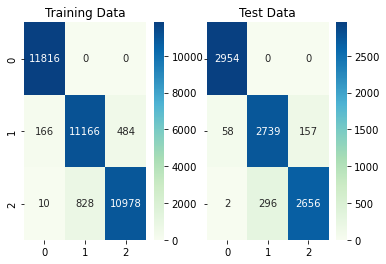

In [57]:


alg = []
train_acc = []
test_acc = []
rec = []
pres = []
f1 = []
roc = []

for clf in MLA:
  alg_name = clf.__class__.__name__
  alg.append(alg_name)
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  y_pred_train = clf.predict(x_train)
  train_acc.append(accuracy_score(y_train, y_pred_train))
  test_acc.append(accuracy_score(y_test, y_pred))
  rec.append(recall_score(y_test, y_pred,average='macro'))
  pres.append(precision_score(y_test, y_pred,average='macro'))
  f1.append(f1_score(y_test, y_pred,average='macro'))
  print(alg_name)
  evaluate_model(clf)

MLA_df = pd.DataFrame({
                      'alg':alg,
                       'train_acc':train_acc,
                      'test_acc':test_acc,
                       'recall':rec,
                       'pres': pres,
                       'f1':f1
                       })

In [58]:
MLA_df.sort_values(by='test_acc', ascending=False)


,alg,train_acc,test_acc,recall,pres,f1
0,LogisticRegression,0.958023,0.942112,0.942112,0.942251,0.941909


### **Applying Scaling for classifiers**


In [59]:

## apply standarization
#x_train_scal = MinMaxScaler().fit_transform(x_train)
#x_test_scal = MinMaxScaler().fit_transform(x_test)

In [60]:
# Noow checking the performance after scaling

#alg = []
#train_acc = []
#test_acc = []
#rec = []
#pres = []
#f1 = []
#roc = []

#for clf in MLA_SCAL:
  #alg_name = clf.__class__.__name__
  #alg.append(alg_name)
  #clf.fit(x_train_scal, y_train)
  #y_pred = clf.predict(x_test_scal)
  #y_pred_train = clf.predict(x_train_scal)
  #train_acc.append(accuracy_score(y_train, y_pred_train))
  #test_acc.append(accuracy_score(y_test, y_pred))
  #rec.append(recall_score(y_test, y_pred,average='macro'))
  #pres.append(precision_score(y_test, y_pred,average='macro'))
  #f1.append(f1_score(y_test, y_pred,average='macro'))
  #print(alg_name)
  # evaluate_model(clf)

#MLA_df_scal = pd.DataFrame({
#                      'alg':alg,
#                       'train_acc':train_acc,
#                       'test_acc':test_acc,
#                       'recall':rec,
#                       'pres': pres,
#                       'f1':f1})

In [61]:
#MLA_df_scal.sort_values(by='test_acc', ascending=False)


In [62]:
# Selected Logistic Regression.

In [63]:
import pickle
from pickle import dump
dump(LogisticRegression,open('model_sentiment.pkl','wb'))
dump(tfidf,open('model_sentiment_tfidf.pkl','wb'))